In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
%matplotlib inline

board_games = pd.read_csv("board_games.csv")
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [2]:
board_games.shape

(81312, 20)

In [3]:
board_games.dropna(axis=0, inplace=True)
board_games.shape

(81268, 20)

In [4]:
board_games = board_games[board_games['users_rated'] > 0]
board_games.shape

(56894, 20)

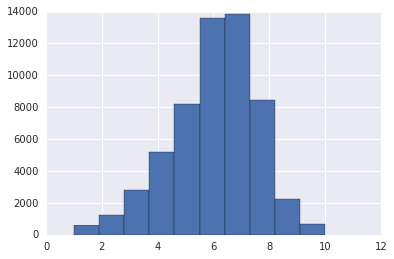

In [5]:
board_games['average_rating'].hist()

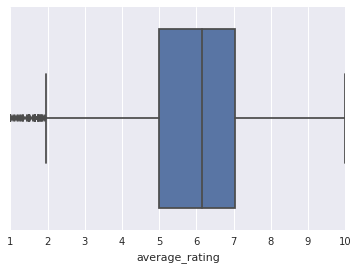

In [6]:
sns.boxplot(x=board_games['average_rating'])

In [7]:
std = board_games['average_rating'].std()
std

1.5788299348332961

In [8]:
board_games['average_rating'].mean()

6.0161128493338492

## Use Mean Squared Error

Use Mean Squared Error metric for continuous data to penalize larger errors more 

In [9]:
numeric_columns = board_games.iloc[:,3:]
numeric_columns.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [10]:
km = KMeans(n_clusters=5)
km.fit(numeric_columns)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [11]:
labels = km.labels_
set(labels)

{0, 1, 2, 3, 4}

In [12]:
game_mean = numeric_columns.apply(np.mean, axis=1)
game_mean.head()

0    3806.296359
1    2662.195541
2    1979.243229
3    2467.201242
4    6360.675421
dtype: float64

In [13]:
game_std = numeric_columns.apply(np.std, axis=1)
game_std.head()

0     7450.209585
1     4933.084135
2     3514.218155
3     4367.915199
4    13321.625345
dtype: float64

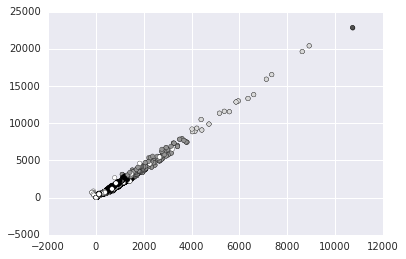

In [14]:
plt.scatter(game_mean, game_std, c=labels)

This shows a linear relationship

In [15]:
numeric_columns.corr()['average_rating']

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [16]:
#remove columns that don't correlate
numeric_columns.drop(['minplayers','maxplayers','playingtime','minplaytime','maxplaytime'],axis=1,inplace=True)
cols = list(numeric_columns.columns)
#remove columns that derive from avg rating
cols.remove('average_rating')
cols.remove('bayes_average_rating')
cols

['yearpublished',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [17]:
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(board_games[cols],board_games['average_rating'])
predictions=lr.predict(board_games[cols])
error=mean_squared_error(board_games['average_rating'],predictions)
print(error)

2.0970561336


In [18]:
predictions

array([ 10.7184265 ,  10.32890577,  10.77306696, ...,   6.12082816,
         5.53469791,   6.07925823])

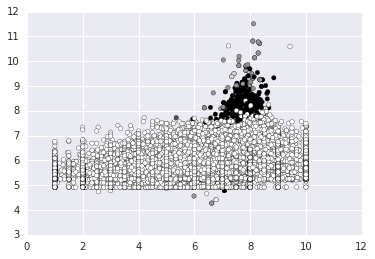

In [19]:
plt.scatter(board_games['average_rating'], predictions, c=labels)

In [20]:
abs(std - error)

0.51822619877163922

Being that the error rate is not too far off from our standard deviation, this model may not be the best predictor